<a href="https://colab.research.google.com/github/LuisRubert/Proyecto_2/blob/main/Proyecto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Conjunto de datos de predicción y análisis de ataques cardíacos

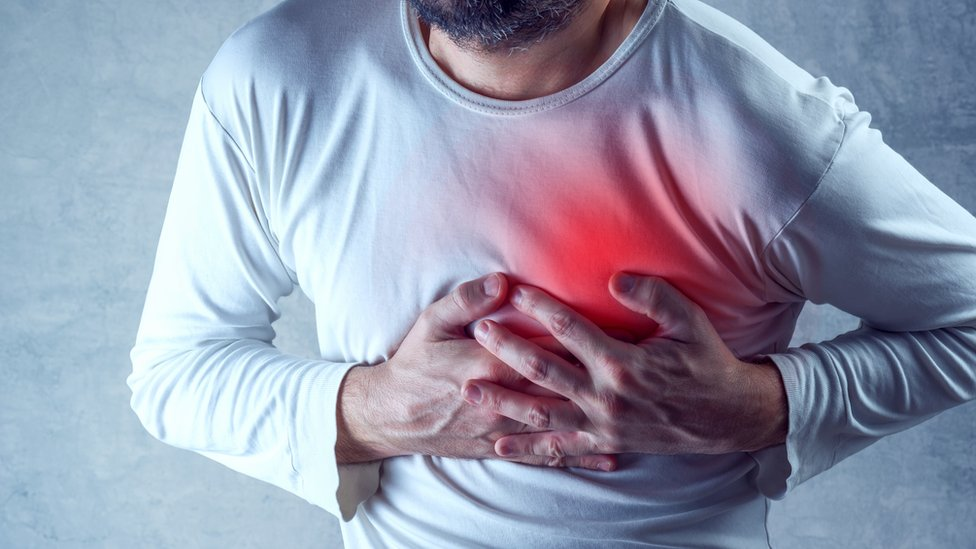

##Limpieza de datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
df=pd.read_csv("/content/heart.csv")

In [ ]:
df.duplicated().sum()

1

In [ ]:
#Eliminamos el duplicado encontrado
df=df.drop_duplicates()

In [ ]:
df.head(20)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
df.shape

(302, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [ ]:
# Comprobanos el equilibrio de los datos
new_var = df['output'].value_counts(normalize=True)
new_var

output
1    0.543046
0    0.456954
Name: proportion, dtype: float64

Indica que el 54.3% de las observaciones en la columna output tienen el valor 1, y el 45.7% tienen el valor 0. Esto significa que la mayoría de los datos en el conjunto indican un evento positivo (ataque al corazón) en la columna output.Un balance cercano al 50-50, es favorable para muchos modelos de machine learning, ya que evita el sesgo hacia la clase mayoritaria. En este caso, aunque no es perfectamente balanceado, sigue siendo bastante equitativo.

In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Los datos tienen coherencia con sus columnas.

# Visualización

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

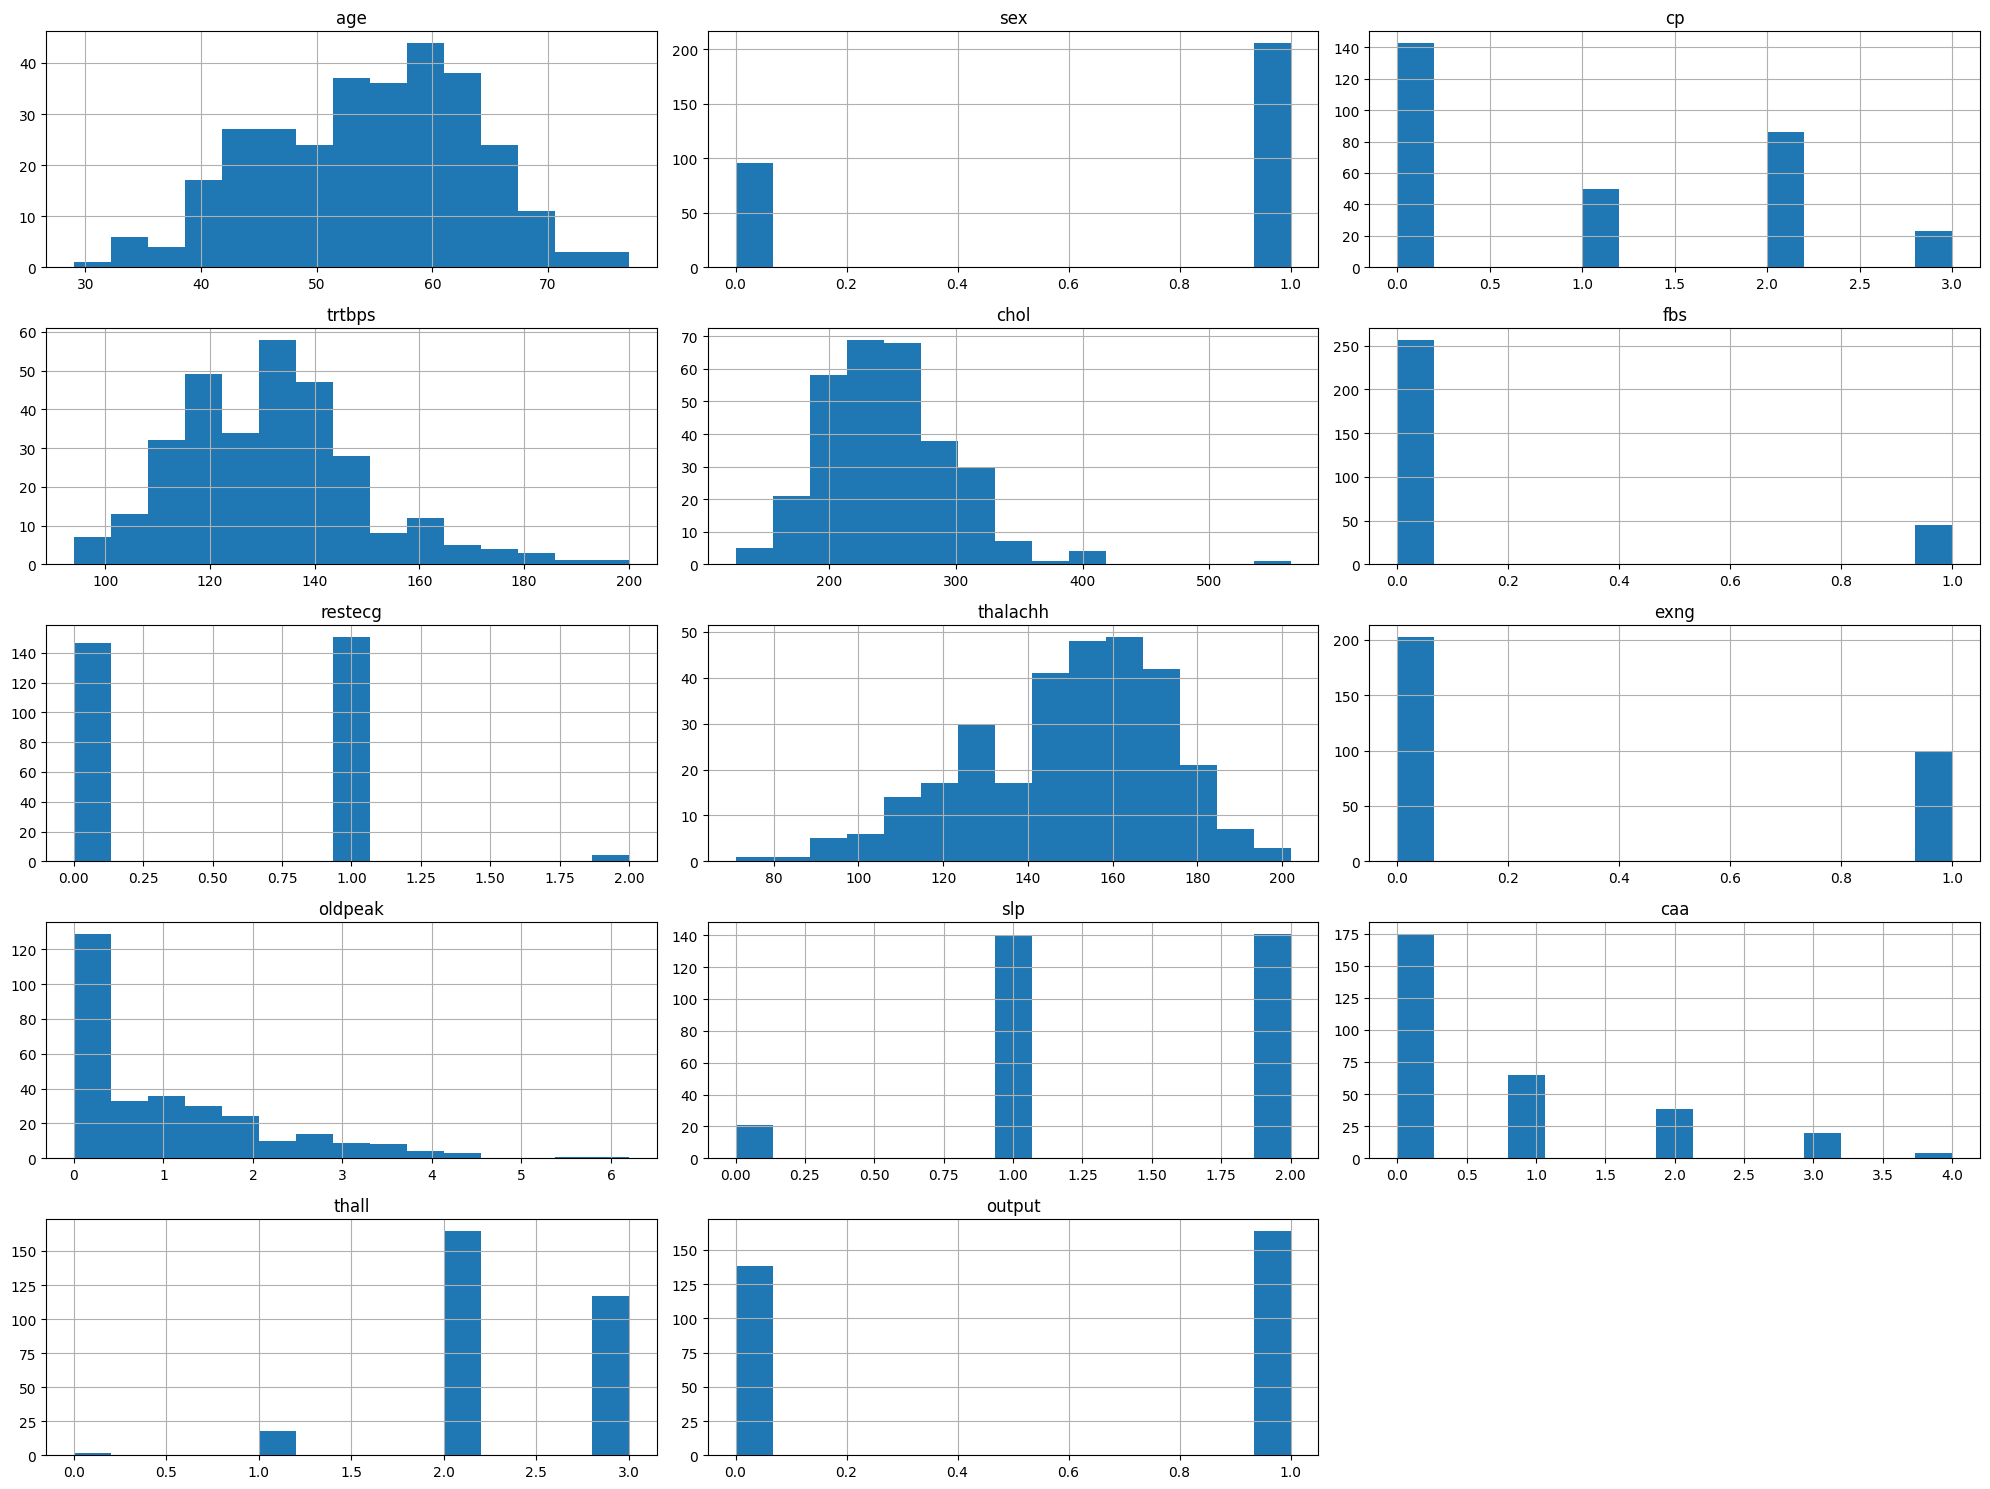

In [ ]:
# Histogramas de las variables numéricas
df.hist(bins=15, figsize=(20, 15), layout=(5, 3))
plt.tight_layout()
plt.show()

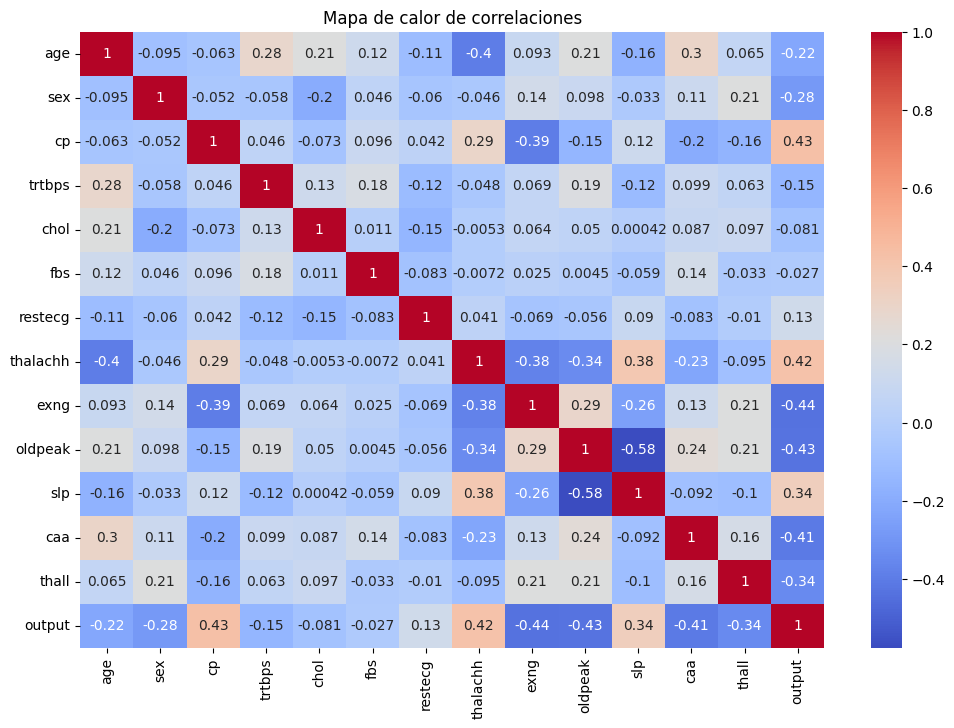

In [ ]:
# Heatmap de correlación con la variable objetivo
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlaciones')
plt.show()

El heatmap de correlación con la variable objetivo nos proporciona valiosa información sobre cuáles variables están más fuertemente relacionadas con la ocurrencia de ataques al corazón. Este conocimiento puede guiar las intervenciones preventivas y el enfoque del tratamiento. Las variables con alta correlación positiva o negativa son clave para entender los factores de riesgo y para construir modelos predictivos más precisos. En resumen, la frecuencia cardíaca máxima alcanzada y el tipo de dolor de pecho son factores críticos en la predicción de ataques al corazón, mientras que otros factores como el azúcar en sangre y los resultados del electrocardiograma en reposo son menos relevantes en este contexto.

<ipython-input-37-3a38dfd5f3de>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='output', data=df, palette='Set1')


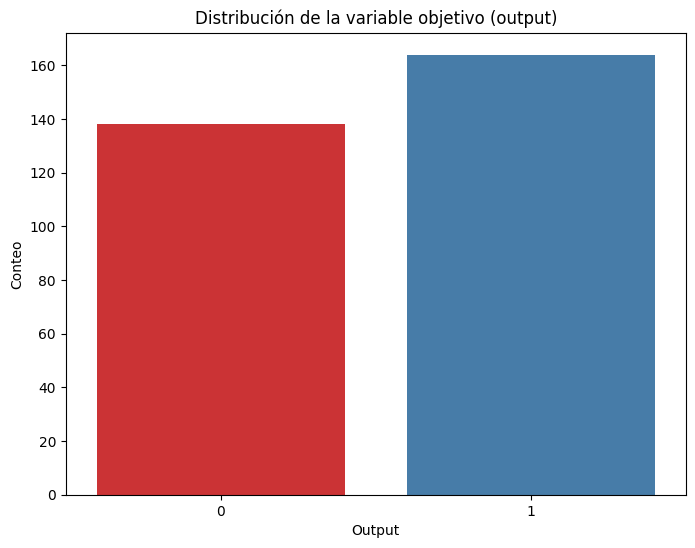

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='output', data=df, palette='Set1')
plt.title('Distribución de la variable objetivo (output)')
plt.xlabel('Output')
plt.ylabel('Conteo')
plt.show()

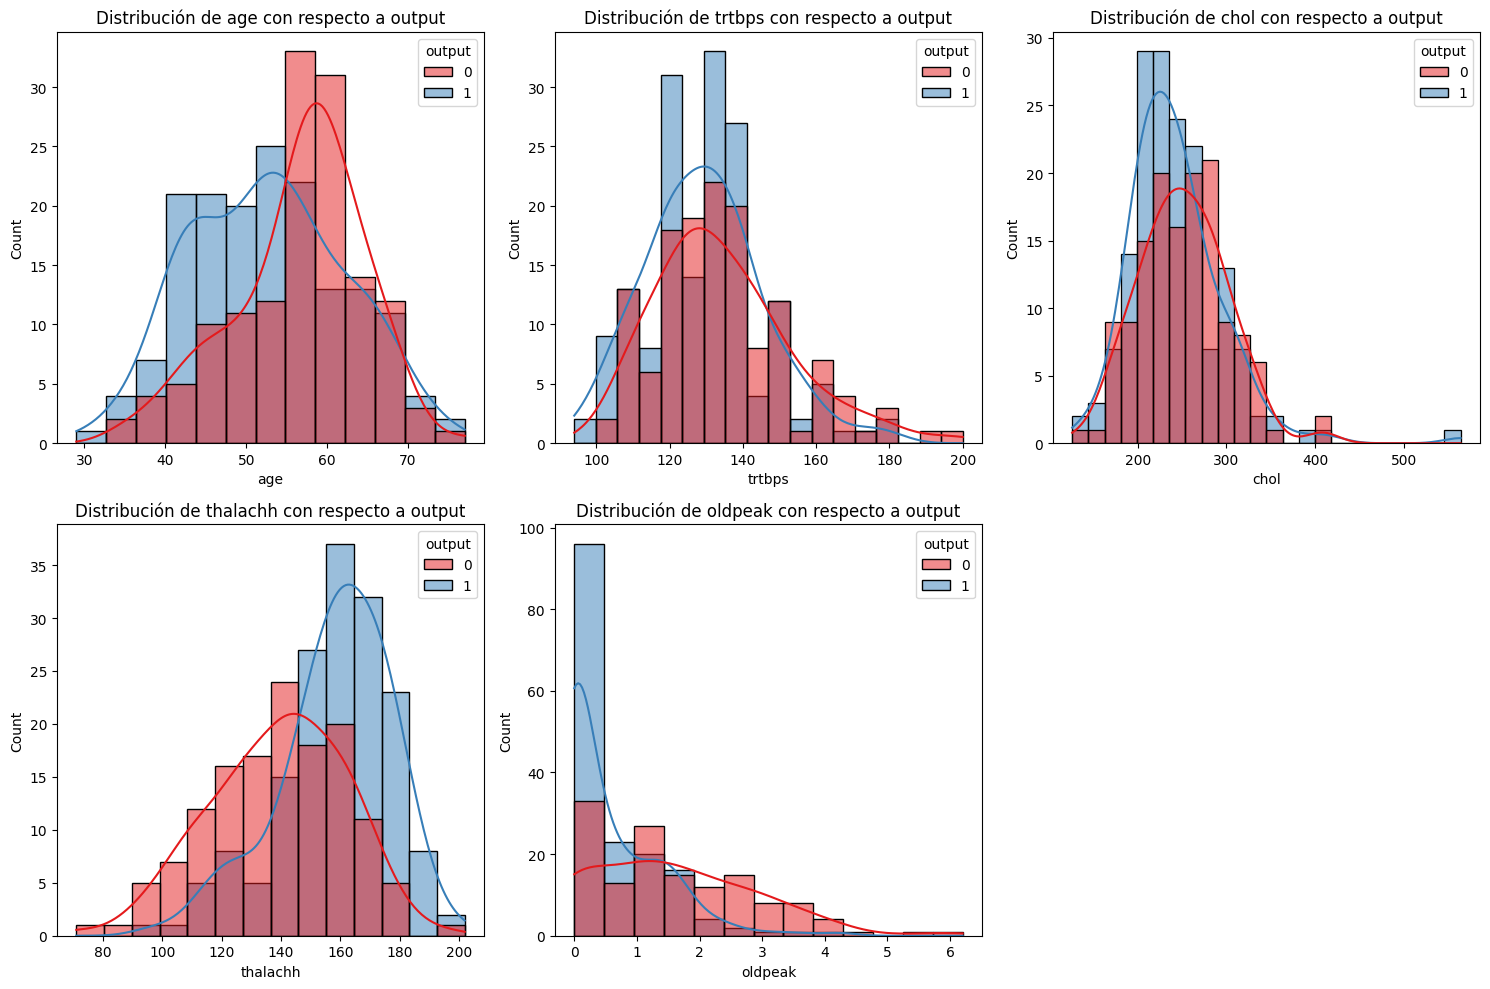

In [ ]:
# Variables numéricas
numerical_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(data=df, x=feature, hue='output', kde=True, palette='Set1')
    plt.title(f'Distribución de {feature} con respecto a output')
plt.tight_layout()
plt.show()

<ipython-input-39-2fa8bfe7563a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='output', y=feature, data=df, palette='Set1')
<ipython-input-39-2fa8bfe7563a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='output', y=feature, data=df, palette='Set1')
<ipython-input-39-2fa8bfe7563a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='output', y=feature, data=df, palette='Set1')
<ipython-input-39-2fa8bfe7563a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` varia

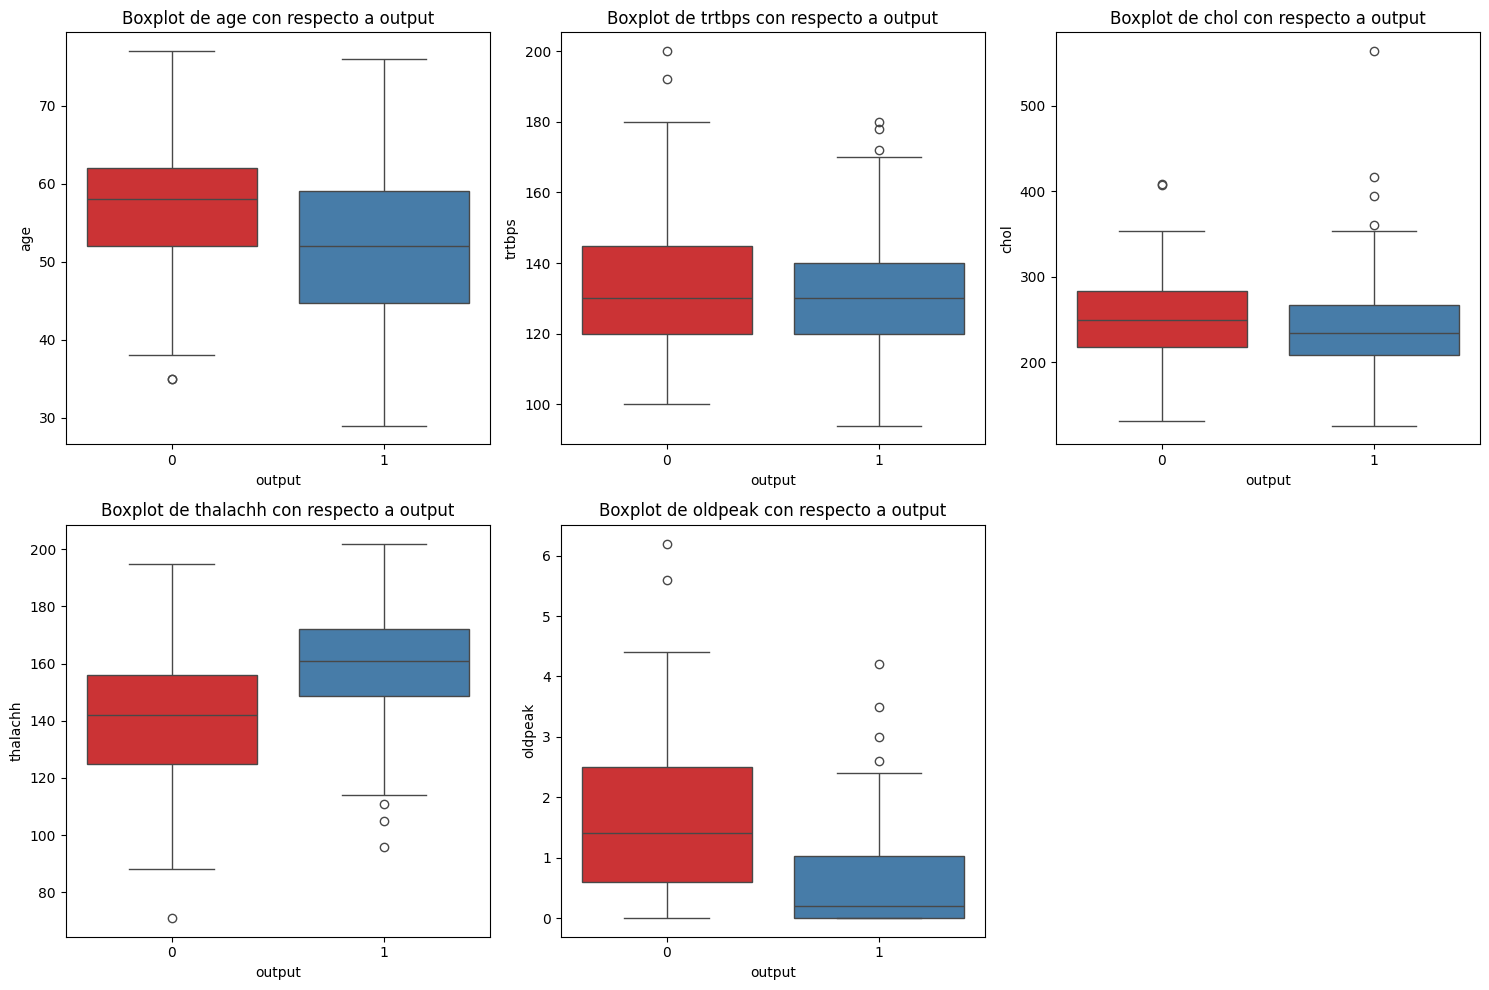

In [ ]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='output', y=feature, data=df, palette='Set1')
    plt.title(f'Boxplot de {feature} con respecto a output')
plt.tight_layout()
plt.show()

Estos boxplots nos permiten visualizar las diferencias en la distribución de las variables en relación con la presencia o ausencia de ataques al corazón, proporcionando insights valiosos para la construcción de modelos predictivos y la implementación de estrategias preventivas.

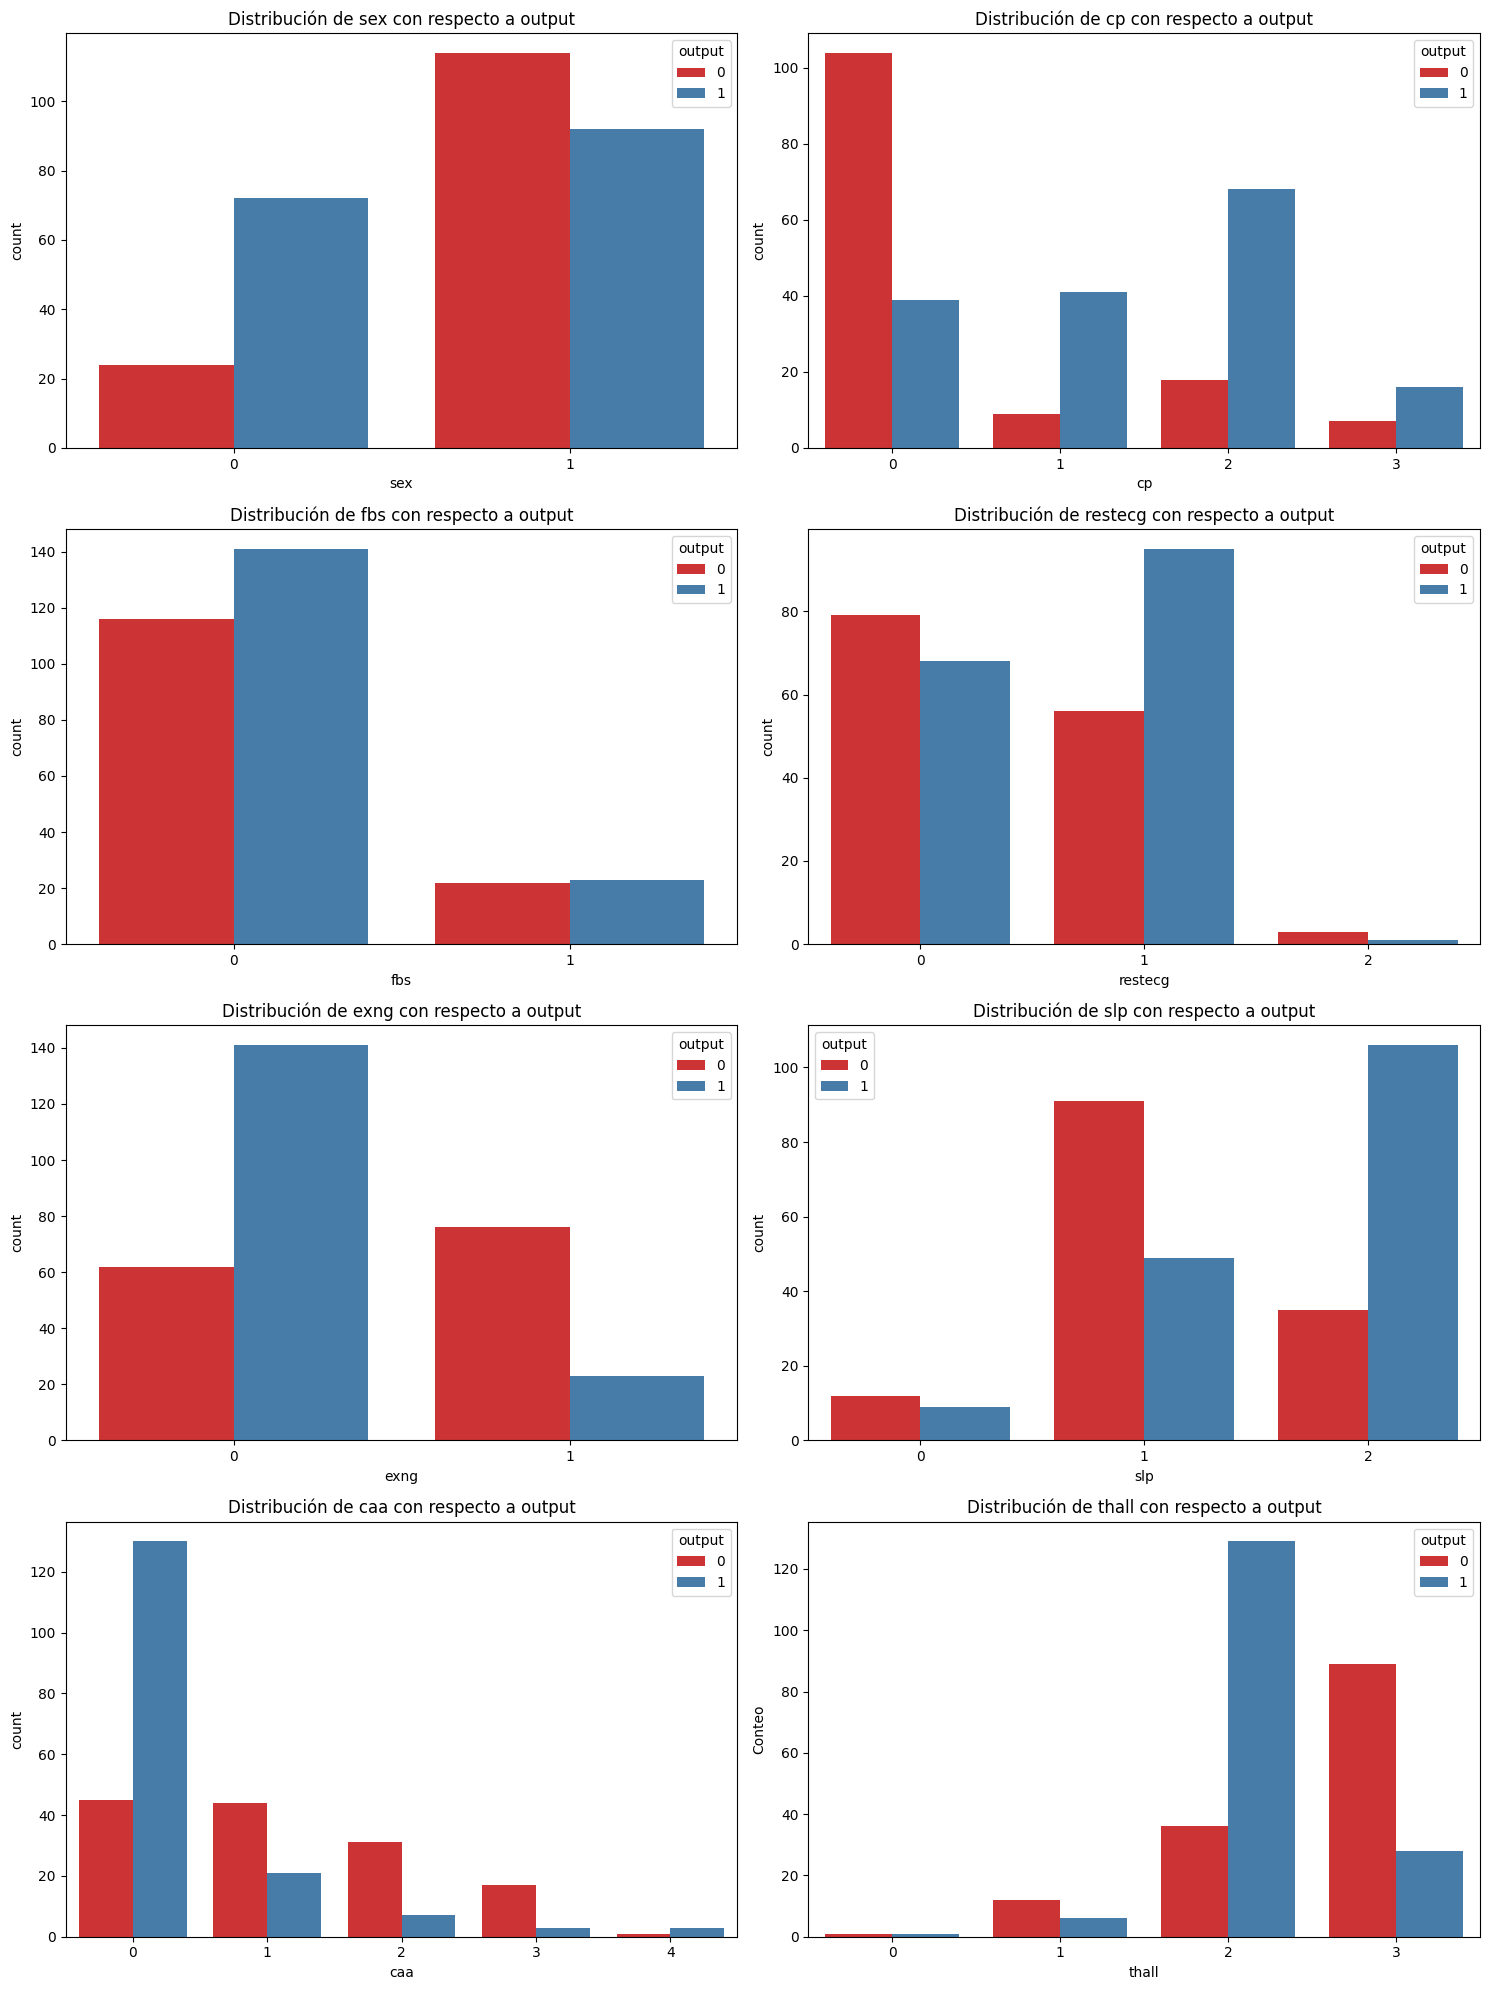

In [ ]:
# Variables categóricas
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

plt.figure(figsize=(15, 20))
for i, feature in enumerate(categorical_features):
    plt.subplot(4, 2, i+1)
    sns.countplot(x=feature, hue='output', data=df, palette='Set1')
    plt.title(f'Distribución de {feature} con respecto a output')
plt.xlabel(feature)
plt.ylabel('Conteo')
plt.legend(title='output')
plt.tight_layout()
plt.show()

Los countplots nos permiten identificar patrones y relaciones entre variables categóricas y la variable objetivo. Estos insights son valiosos para entender cómo diferentes características pueden influir en la probabilidad de sufrir un ataque al corazón. Por ejemplo, variables como el sexo, el tipo de dolor de pecho, la angina inducida por el ejercicio y el número de vasos coloreados por fluoroscopia parecen estar más fuertemente asociadas con la presencia de ataques al corazón en este conjunto de datos. Esta información es crucial para el desarrollo de modelos predictivos efectivos y la implementación de estrategias de prevención y tratamiento más específicas.

# Preprocesamiento de Datos

In [ ]:
# Normalización/Estandarización
X = df.drop('output', axis=1)
y = df['output']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Entrenamiento y Evaluación de Modelos

Logistic Regression Accuracy: 0.819672131147541
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



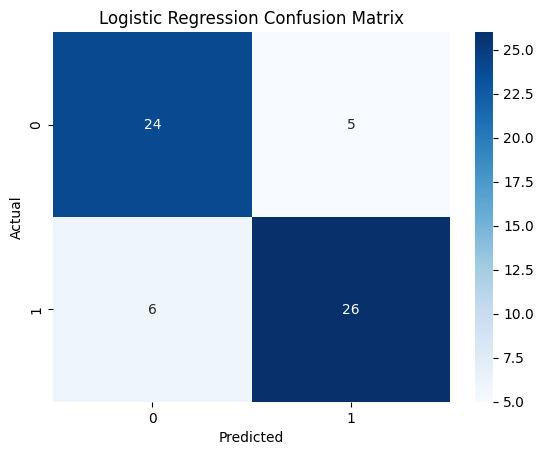

In [ ]:
#Logistic Regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression matriz de confusión')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

La regresión logística tiene un buen rendimiento, pero muestra un ligero sesgo hacia la clase 1, con una precisión y recall aceptables. Es un modelo lineal que es fácil de interpretar y proporciona coeficientes para cada característica.

K-Nearest Neighbors Accuracy: 0.9180327868852459
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        29
           1       0.97      0.88      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



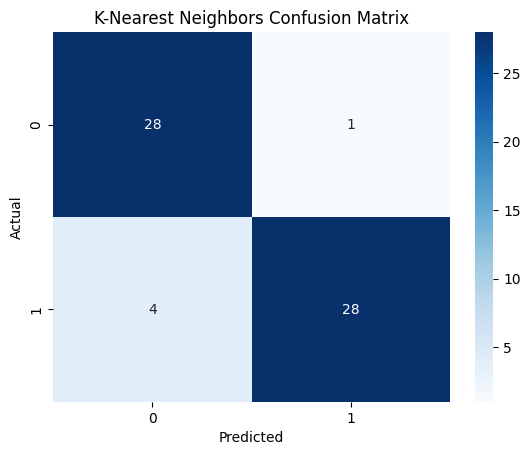

In [ ]:
# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("K-Nearest Neighbors Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.title('K-Nearest Neighbors matriz de confusión')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

KNN ha mostrado la mejor precisión y un balance casi perfecto entre precision y recall. Esto sugiere que el modelo es excelente para clasificar correctamente tanto los ataques al corazón como los no ataques.

Gradient Boosting Classifier Accuracy: 0.8524590163934426
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



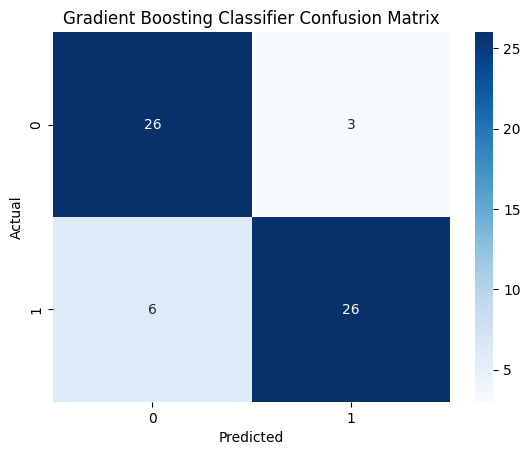

In [ ]:
# Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)

print("Gradient Boosting Classifier Accuracy:", accuracy_score(y_test, y_pred_gbc))
print(classification_report(y_test, y_pred_gbc))

conf_matrix_gbc = confusion_matrix(y_test, y_pred_gbc)
sns.heatmap(conf_matrix_gbc, annot=True, fmt='d', cmap='Blues')
plt.title('Gradient Boosting Classifier matriz de confusión')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

El Gradient Boosting también tiene un buen rendimiento, especialmente en la precisión de la clase 1. Sin embargo, tiene un menor recall para la clase 1 en comparación con KNN.

Random Forest Classifier Accuracy: 0.8688524590163934
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



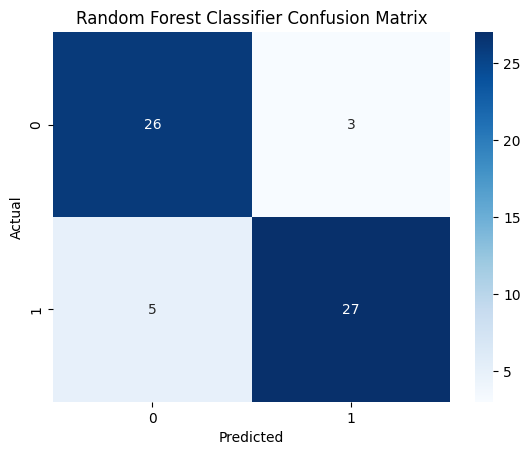

In [ ]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Classifier matriz de confusión')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

El Random Forest es robusto y tiene un rendimiento equilibrado similar al Gradient Boosting. Proporciona una buena precisión y recall para ambas clases.

## Selección del modelo

En base a las métricas de desempeño de cada modelo, el K-Nearest Neighbors (KNN) ha mostrado el mejor rendimiento con una precisión del 91.8%. Vamos a elegir KNN como el modelo preferido por las siguientes razones:

Alta Precisión: KNN tiene la precisión más alta entre los modelos evaluados.

Balance entre Precision y Recall: Ambos valores son altos y equilibrados, lo que sugiere un buen rendimiento en términos de identificar correctamente tanto los positivos como los negativos.

# Conclusión

En nuestro análisis, identificamos varios factores clave que influyen en la probabilidad de ataques al corazón, como la edad, el sexo, el tipo de dolor de pecho, la presión arterial, el colesterol, la frecuencia cardíaca máxima alcanzada, la depresión del ST inducida por el ejercicio y el número de vasos coloreados. Basándonos en estos factores, propusimos estrategias como el monitoreo regular de pacientes de riesgo, la promoción de un estilo de vida saludable, programas de educación y concienciación, control de factores de riesgo a través de tratamientos médicos, evaluaciones cardíacas regulares y el uso de medicación preventiva. Nuestro análisis exploratorio de datos (EDA) y el entrenamiento de varios modelos de machine learning, destacando al K-Nearest Neighbors (KNN) como el más preciso con una precisión del 91.8%, nos permitieron no solo identificar los factores de riesgo más relevantes, sino también desarrollar un enfoque integral para la prevención y tratamiento de ataques al corazón.